In [1]:
import math
import random as rnd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from IPython.display import clear_output
import time
from scipy import stats

dbug = True
plt.rcParams["figure.figsize"] = (10,10)  

In [2]:
class Agent:
    t_now = 0
    t_next = 1
    
    @staticmethod
    def tick():
        Agent.t_next,Agent.t_now = Agent.t_now, Agent.t_next    
    
    @staticmethod
    def reset():
        Agent.t_now = 0
        Agent.t_next = 1

    def __init__(self,id,state):
        self.id = id
        self._state = [state,0]
        self.links = []
        
    @property
    def state(self):
        return self._state[Agent.t_now]
    
    @state.setter
    def state(self,state):
        self._state[Agent.t_next] = state
        
    def add_link(self,agent):
        if agent not in self.links:
            self.links.append(agent)
            
    def majority(self):
        states = [a.state for a in self.links]
        new_state = self.state
        if len(states)>0:
            items = set(states)
            c_max= 0
            point = 0
            for i in items:
                c = states.count(i)
                if (c> c_max) or (c==c_max and rnd.random()<0.5) :
                    c_max = c
                    point = i
            new_state = point
        self.state = new_state 
                
                
                
        
        

In [3]:
class Population:
    def __init__(self,number_of_agents,number_of_links):
        Agent.reset()
        self.agents= [Agent(i,rnd.randint(0,3)) for i in range(number_of_agents)]
        self.network = nx.erdos_renyi_graph(number_of_agents,number_of_links/number_of_agents)
        edges = list(self.network.edges())
        #self.pos = nx.spring_layout(self.network)
        self.pos = nx.random_layout(self.network)
        for edge in edges:
            a1 = self.agents[edge[0]]
            a2 = self.agents[edge[1]]
            a1.add_link(a2)
            a2.add_link(a1)
        Agent.tick()
    
    def iterate(self):
        for a in self.agents:
            a.majority()
        Agent.tick()
            
    def draw_network(self):
        cols = ["red","green","blue","yellow"]
        colors = [cols[a.state] for a in self.agents]
        nx.draw_networkx(self.network,pos=self.pos,node_color = colors, with_labels=False, node_size=50,width=0.2,font_size=8) 
        plt.show()

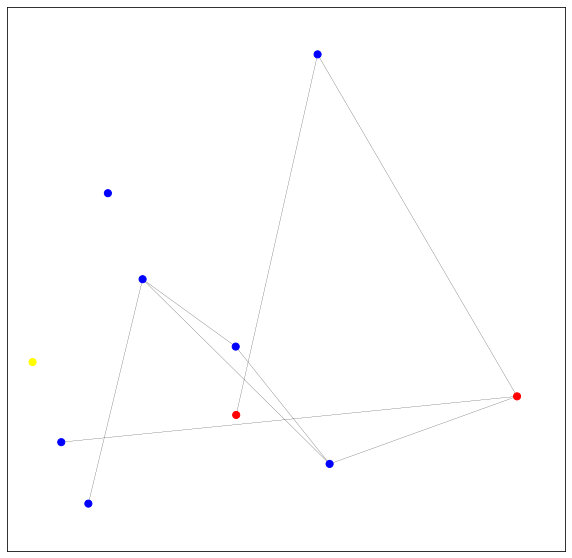

done


In [6]:
population = Population(10,2)
print("Start")
Agent.tick()
for _ in range(10):
    population.iterate()
    clear_output(wait=True)
    population.draw_network()
    time.sleep(2)
print("done")